In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Познакомьтесь с возможностями библиотеки sklearn по загрузке датасетов из репозитория openml.org

In [4]:
from sklearn.datasets import fetch_openml

2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.

In [11]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='machine_cpu', version=1)

In [10]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125.0,256.0,6000.0,256.0,16.0,128.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0


In [12]:
df = machine_cpu.data

NameError: name 'machine_cpu' is not defined

In [5]:
df

,Position,Oral,Written,Race,Combine
0,Captain,89.52,95.0,W,92.808
1,Captain,80.00,95.0,W,89.000
2,Captain,82.38,87.0,W,85.152
3,Captain,88.57,76.0,W,81.028
4,Captain,76.19,84.0,W,80.876
...,...,...,...,...,...
113,Lieutenant,40.83,64.0,H,54.732
114,Lieutenant,52.08,56.0,B,54.432
115,Lieutenant,48.33,58.0,H,54.132
116,Lieutenant,52.92,49.0,B,50.568


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  118 non-null    object 
 1   Oral      118 non-null    float64
 2   Written   118 non-null    float64
 3   Race      118 non-null    object 
 4   Combine   118 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.7+ KB


In [7]:
df.describe()

,Oral,Written,Combine
count,118.000000,118.000000,118.000000
mean,65.523390,71.652542,69.200881
std,12.421927,10.622808,9.387575
min,40.830000,46.000000,45.932000
25%,55.387500,65.000000,60.942000
50%,66.040000,71.500000,69.502000
75%,73.810000,78.500000,75.832000
max,92.080000,95.000000,92.808000


3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему

Набор данных содержит результаты устных, письменных и комбинированных тестов для экзаменов на повышение в пожарной службе Нью-Хейвена в 2003 году. Также указаны раса и положение каждого участника теста.
Благодаря этому набору данных можно оценить уровень знаний для каждого тестируемого по параметрам расы и положения на службе. 

4. Удалите, если нужно, нечисловые колонки в датасете.

In [8]:
df = df.select_dtypes(include=['float64'])
df

,Oral,Written,Combine
0,89.52,95.0,92.808
1,80.00,95.0,89.000
2,82.38,87.0,85.152
3,88.57,76.0,81.028
4,76.19,84.0,80.876
...,...,...,...
113,40.83,64.0,54.732
114,52.08,56.0,54.432
115,48.33,58.0,54.132
116,52.92,49.0,50.568


5.	При необходимости заполните нулем пропущенные значения.

In [9]:
df.fillna(0)

,Oral,Written,Combine
0,89.52,95.0,92.808
1,80.00,95.0,89.000
2,82.38,87.0,85.152
3,88.57,76.0,81.028
4,76.19,84.0,80.876
...,...,...,...
113,40.83,64.0,54.732
114,52.08,56.0,54.432
115,48.33,58.0,54.132
116,52.92,49.0,50.568


6.	Постройте гистограммы распределения по каждому признаку.

In [10]:
df.columns

Index(['Oral', 'Written', 'Combine'], dtype='object')

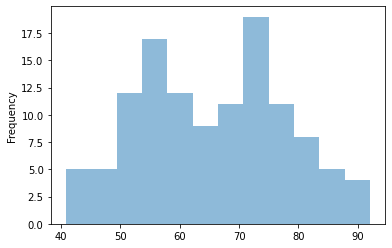

In [11]:
ax1 = df['Oral'].plot.hist(bins=12, alpha=0.5)

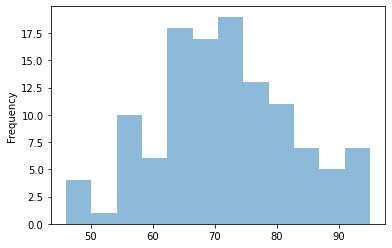

In [12]:
ax2 = df['Written'].plot.hist(bins=12, alpha=0.5)

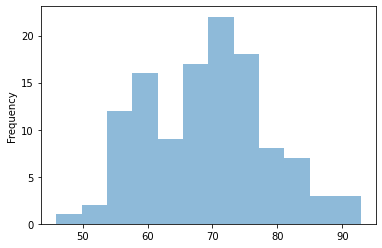

In [13]:
ax1 = df['Combine'].plot.hist(bins=12, alpha=0.5)

7.	Постройте модель машинного обучения, обучите ее на всем датасете.

In [20]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [14]:
y = df.Combine
X = df.drop(["Combine"], axis=1)
y.shape, X.shape

AttributeError: 'DataFrame' object has no attribute 'Combine'

In [23]:
from sklearn import preprocessing
from sklearn import utils

In [25]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [28]:
logistic.fit(X, y_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

8.	Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.

In [30]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Oral 0.20001578033504397
Written -0.1540299289888656


In [31]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [ 0.24271804  0.18654093  0.17729283  0.15968418  0.16140235  0.12290483
  0.13077266  0.14255709  0.12643397  0.13930543  0.1332753   0.10562135
  0.10034863  0.09471142  0.0994117   0.12281933  0.12100399  0.09741459
  0.10175126  0.08001896  0.11130262  0.10036829  0.08317513  0.09021269
  0.09889418  0.08256343  0.08159053  0.03271939  0.06750642  0.09532697
  0.09404775  0.08119554  0.0812734   0.04807097  0.05973533  0.0681211
  0.04646062  0.05019768  0.04819582  0.01593036  0.04178585  0.02590507
  0.03575611  0.02483115  0.00941541 -0.00400796  0.03415753  0.01338666
  0.0065967  -0.01866228  0.0216082  -0.02711943  0.05114044  0.00098752
  0.00305362 -0.00377069  0.01098222  0.00869894 -0.01117    -0.00024718
 -0.00799331 -0.01662422 -0.00633759 -0.02009257 -0.04680372 -0.01169193
 -0.00310935 -0.04901373 -0.04423149 -0.02934102 -0.01125836 -0.02577449
 -0.02331955 -0.0352624  -0.01810479 -0.02126708 -0.04916638 -0.0288375
 -0.0356241  -0.04588196 -0.06736779 -0.

In [41]:
logistic.score(X, y_transformed)

0.1016949152542373

Модель делает в среднем ошибки в 90% случаев. Сравнивая предсказанные и действительные значения, можно наглядно увидеть, что разница колоссальная, из чего следует вывод, что модель нельзя использовать в дальнейшем без каких-либо действий по переобучиванию.
Данная неточность могла возникнуть благодаря многим факторам: например, слишком большой объем выборки и отсутствие переобучивания данной модели. 

9.	Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.

In [38]:
from sklearn import metrics
metrics.confusion_matrix(y_transformed, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y_transformed, y_pred))[:10]]

112 98
110 103
107 98
100 100
99 103
98 103
98 103
96 65
95 103
93 100


Даже сравнивая первые 10 строк с предсказанными и реальными значениями, можно определить, что модель достаточно неточна -- в среднем, действительно, неточность составляет около 90%.

<AxesSubplot:>

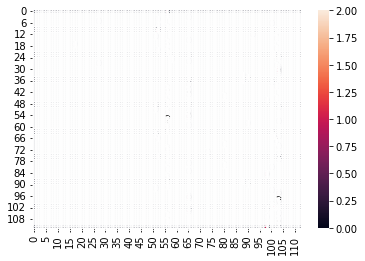

In [39]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_transformed, y_pred), annot=True)

10.	Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

NameError: name 'X' is not defined

In [46]:
polynomial = LogisticRegression()
polynomial.fit(poly, y_transformed)
y_pred_poly = polynomial.predict(poly)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
polynomial.score(poly, y_transformed)

0.211864406779661

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y_transformed)

KNeighborsClassifier(n_neighbors=2)

In [54]:
neigh.score(X, y_transformed)

0.5338983050847458

Как можно заметить, различные методы классификации дают различные результаты, и наиболее оптимальным для предоставленного набора данных среди всех рассмотренных оказался метод ближайших соседей.